In [9]:
pwd

'/Users/elitsa/Dropbox/single_cell_cerebellum'

In [2]:
!pip install -U loompy


Requirement already up-to-date: loompy in /anaconda3/lib/python3.6/site-packages (2.0.17)


In [2]:
import loompy

In [3]:

ds = loompy.connect("l6_r3_cerebellum_neurons.loom")
ds

,,,,,,,Age,p19,p25,p19,p19,p19,p19,p19,p19,p19,p19,...
,,,,,,,AnalysisPool,Cerebellum,Cerebellum,Cerebellum,Cerebellum,Cerebellum,Cerebellum,Cerebellum,Cerebellum,Cerebellum,Cerebellum,...
,,,,,,,AnalysisProject,Adolescent,Adolescent,Adolescent,Adolescent,Adolescent,Adolescent,Adolescent,Adolescent,Adolescent,Adolescent,...
,,,,,,,Bucket,/Users/sten/build_20171205/L4_Hindbrain_Inhibitory.loom,/Users/sten/build_20171205/L4_Hindbrain_Inhibitory.loom,/Users/sten/build_20171205/L4_Hindbrain_Inhibitory.loom,/Users/sten/build_20171205/L4_Hindbrain_Inhibitory.loom,/Users/sten/build_20171205/L4_Hindbrain_Inhibitory.loom,/Users/sten/build_20171205/L4_Hindbrain_Inhibitory.loom,/Users/sten/build_20171205/L4_Hindbrain_Inhibitory.loom,/Users/sten/build_20171205/L4_Hindbrain_Inhibitory.loom,/Users/sten/build_20171205/L4_Hindbrain_Inhibitory.loom,/Users/sten/build_20171205/L4_Hindbrain_Inhibitory.loom,...
,,,,,,,CellConc,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...
,,,,,,,CellID,10X51_2_TTATACAGCACT-,10X26_1_CAGACTGACAGATC-1,10X51_1_TAATGAGTACAC-,10X51_1_AGATGACTGAAC-,10X51_2_AGTGTGCTTAGG-,10X51_2_ATTCACCCTTGC-,10X51_1_AGATGATAAGCC-,10X51_1_GCAGGAGCTACA-,10X51_1_TTTGCTTCTGGA-,10X51_1_TCTAGAAGCGGA-,...
,,,,,,,Cell_Conc,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...
,,,,,,,ChipID,10X51,10X26,10X51,10X51,10X51,10X51,10X51,10X51,10X51,10X51,...
,,,,,,,Class,Neurons,Neurons,Neurons,Neurons,Neurons,Neurons,Neurons,Neurons,Neurons,Neurons,...
,,,,,,,ClassProbability_Astrocyte,0.0020897945840014183,0.0020413355802848267,0.0006605480923604451,0.002193989119094472,0.0028704186492867338,0.0015824309845305414,0.0015488805190061604,0.0017924826793768757,0.0016857807354469982,0.001541058031087465,...
,,,,,,,"ClassProbability_Astrocyte,Immune",0.0005331608133291047,0.0005239601277821945,7.460510947171706e-05,0.0005521557982560714,0.0006742271242435985,0.00042242248417455336,0.0004171772621887384,0.0004705249884489212,0.00042599644772413093,0.00040018088799356657,...


In [22]:
ds[ds.ca.ClusterName == "CBPC", :]

array([[  3.,   9.,   0., ...,   0.,   0.,   0.],
       [ 62., 114.,   0., ...,   0.,   0.,   0.],
       [  6.,   8.,   3., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32)

In [25]:
ds[ds.ra.Gene == "Itpr1", :]

array([[ 62., 114.,   0., ...,   0.,   0.,   0.]], dtype=float32)

In [23]:
ds[ds.ca.ClusterName == "CBPC", :].shape

(84, 5292)

In [36]:
ds[ds.ca.Age == "p25", :].shape

(2248, 5292)

In [39]:
set(ds.ca.Age)

{'p12, p35',
 'p16, p24',
 'p19',
 'p20',
 'p21',
 'p22',
 'p23',
 'p25',
 'p26',
 'p28'}

In [4]:
#### scanpy

import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

In [18]:
cb_loom = sc.read_loom('l6_r3_cerebellum_neurons.loom')

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [19]:
cb_loom

AnnData object with n_obs × n_vars = 5292 × 27998 
    obs: 'Age', 'AnalysisPool', 'AnalysisProject', 'Bucket', 'CellConc', 'Cell_Conc', 'ChipID', 'Class', 'ClassProbability_Astrocyte', 'ClassProbability_Astrocyte,Immune', 'ClassProbability_Astrocyte,Neurons', 'ClassProbability_Astrocyte,Oligos', 'ClassProbability_Astrocyte,Vascular', 'ClassProbability_Bergmann-glia', 'ClassProbability_Blood', 'ClassProbability_Blood,Vascular', 'ClassProbability_Enteric-glia', 'ClassProbability_Enteric-glia,Cycling', 'ClassProbability_Ependymal', 'ClassProbability_Ex-Neurons', 'ClassProbability_Ex-Vascular', 'ClassProbability_Immune', 'ClassProbability_Immune,Neurons', 'ClassProbability_Immune,Oligos', 'ClassProbability_Neurons', 'ClassProbability_Neurons,Cycling', 'ClassProbability_Neurons,Oligos', 'ClassProbability_Neurons,Satellite-glia', 'ClassProbability_Neurons,Vascular', 'ClassProbability_OEC', 'ClassProbability_Oligos', 'ClassProbability_Oligos,Cycling', 'ClassProbability_Oligos,Vascular', 'Cla

In [26]:
cb_loom.var_names_make_unique()
cb_loom.obs_names_make_unique()

In [22]:
cb_loom

AnnData object with n_obs × n_vars = 5292 × 27998 
    obs: 'Age', 'AnalysisPool', 'AnalysisProject', 'Bucket', 'CellConc', 'Cell_Conc', 'ChipID', 'Class', 'ClassProbability_Astrocyte', 'ClassProbability_Astrocyte,Immune', 'ClassProbability_Astrocyte,Neurons', 'ClassProbability_Astrocyte,Oligos', 'ClassProbability_Astrocyte,Vascular', 'ClassProbability_Bergmann-glia', 'ClassProbability_Blood', 'ClassProbability_Blood,Vascular', 'ClassProbability_Enteric-glia', 'ClassProbability_Enteric-glia,Cycling', 'ClassProbability_Ependymal', 'ClassProbability_Ex-Neurons', 'ClassProbability_Ex-Vascular', 'ClassProbability_Immune', 'ClassProbability_Immune,Neurons', 'ClassProbability_Immune,Oligos', 'ClassProbability_Neurons', 'ClassProbability_Neurons,Cycling', 'ClassProbability_Neurons,Oligos', 'ClassProbability_Neurons,Satellite-glia', 'ClassProbability_Neurons,Vascular', 'ClassProbability_OEC', 'ClassProbability_Oligos', 'ClassProbability_Oligos,Cycling', 'ClassProbability_Oligos,Vascular', 'Cla

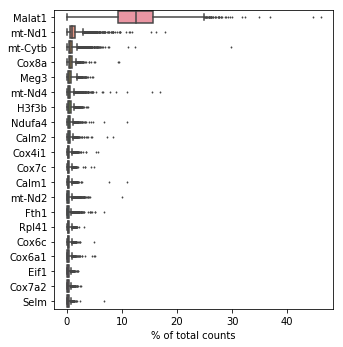

In [27]:
sc.pl.highest_expr_genes(cb_loom, n_top=20)

In [28]:
sc.pp.filter_cells(cb_loom, min_genes=200)
sc.pp.filter_genes(cb_loom, min_cells=3)

In [29]:
mito_genes = cb_loom.var_names.str.startswith('mt-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
cb_loom.obs['percent_mito'] = np.sum(
    cb_loom[:, mito_genes].X, axis=1).A1 / np.sum(cb_loom.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
cb_loom.obs['n_counts'] = cb_loom.X.sum(axis=1).A1

... storing 'Age' as categorical
... storing 'AnalysisPool' as categorical
... storing 'AnalysisProject' as categorical
... storing 'Bucket' as categorical
... storing 'CellConc' as categorical
... storing 'Cell_Conc' as categorical
... storing 'ChipID' as categorical
... storing 'Class' as categorical
... storing 'ClusterName' as categorical
... storing 'Comment' as categorical
... storing 'Comments' as categorical
... storing 'DateCaptured' as categorical
... storing 'Date_Captured' as categorical
... storing 'Description' as categorical
... storing 'Developmental_compartment' as categorical
... storing 'DonorID' as categorical
... storing 'Estimated Number of Cells' as categorical
... storing 'Flowcell' as categorical
... storing 'Fraction Reads in Cells' as categorical
... storing 'Label' as categorical
... storing 'Location_based_on' as categorical
... storing 'Mean Reads per Cell' as categorical
... storing 'Median Genes per Cell' as categorical
... storing 'Median UMI Counts per

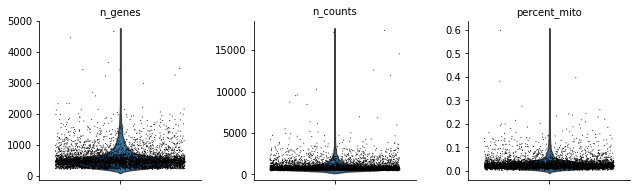

In [30]:
sc.pl.violin(cb_loom, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

In [31]:
cb_loom = cb_loom[cb_loom.obs['n_genes'] < 2500, :]
cb_loom = cb_loom[cb_loom.obs['percent_mito'] < 0.05, :]

In [32]:
sc.pp.normalize_per_cell(cb_loom, counts_per_cell_after=1e4)

In [33]:
sc.pp.log1p(cb_loom)